In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [5]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
y_pred=regressor.predict(X)

In [8]:
np.set_printoptions(precision=2)
print(np.concatenate((y.reshape(len(y),1),y_pred.reshape(len(y_pred),1)),1))

[[  45000.   -114454.55]
 [  50000.    -33575.76]
 [  60000.     47303.03]
 [  80000.    128181.82]
 [ 110000.    209060.61]
 [ 150000.    289939.39]
 [ 200000.    370818.18]
 [ 300000.    451696.97]
 [ 500000.    532575.76]
 [1000000.    613454.55]]


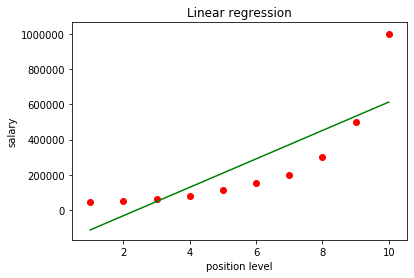

In [9]:
plt.plot(X,y_pred,color='green')
plt.scatter(X,y,color='red')
plt.title('Linear regression')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
regressor_2=LinearRegression()
regressor_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_poly_pred=regressor_2.predict(X_poly)

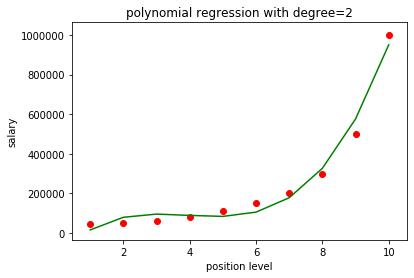

In [12]:
plt.plot(X,y_poly_pred,color='green')
plt.scatter(X,y,color='red')
plt.title('polynomial regression with degree=2')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

# accuracy with linear regression

In [13]:
from sklearn.metrics import r2_score
score=r2_score(y,y_pred)
print(score)

0.6690412331929895


# accuracy with polynomial regression

In [14]:
from sklearn.metrics import r2_score
score=r2_score(y,y_poly_pred)
print(score)

0.9812097727913365


# predicting new result with linear regression model

In [15]:
new_pred=regressor.predict([[6.5]])

In [16]:
new_pred

array([330378.79])

# predicting new result with polynomial regression model

In [17]:
new_poly_pred=regressor_2.predict(poly.fit_transform([[6.5]]))

In [18]:
new_poly_pred

array([133259.47])